# Initial Code for CCXT 

In [9]:
import ccxt



In [10]:
#import ccxt

# Initialize the exchange (e.g., Binance)
#exchange = ccxt.binance()

# Fetch ticker data for BTC/USDT
#ticker = exchange.fetch_ticker('BTC/USDT')
#print(ticker)


# Getting Data from Binance for BTC

In [11]:


# Use your Binance API credentials
exchange = ccxt.binance({
    'apiKey': 'rKI3q7RZSOwaKmtEdpJr8gzW2ck32ZXVAUWhwajXU88pHlrm0cnKqyHWy2n2gbRJ',
    'secret': 'RfA74xF2DloTmJcHSVsIMnpk7YbHhfI4iV1SVv8NIR1pHf1rnCl8n14hfNSWXTiu',
    'options': {'defaultType': 'future'}  # Ensure futures trading mode
})

# Fetch the order book for a symbol (e.g., 'BTC/USDT')
order_book = exchange.fetch_order_book('BTC/USDT')





# Creating the Parameters for the Bot

In [12]:
# Grid Trading Parameters
symbol = 'BTC/USDT'  # Trading pair
grid_levels = 10  # Number of grid orders
grid_spacing = 50  # Price gap between grid orders
order_size = 0.01  # Order size in BTC
leverage = 1 # Leverage multiplier


In [13]:
# Set leverage properly
exchange.set_leverage(leverage, symbol)

{'symbol': 'BTCUSDT', 'leverage': '1', 'maxNotionalValue': '1800000000'}

In [14]:
# Get initial price
price_data = exchange.fetch_ticker(symbol)
initial_price = price_data['last']

# Generate grid price levels
grid_prices = [initial_price + (i - grid_levels // 2) * grid_spacing for i in range(grid_levels)]


In [15]:
import ccxt
import pandas as pd

# Initialize Binance exchange (without API keys for public data)
exchange = ccxt.binance()

# Fetch historical data (Example: BTC/USDT, 1-minute timeframe)
bars = exchange.fetch_ohlcv('BTC/USDT', timeframe='1m', limit=500)

# Convert to DataFrame
df = pd.DataFrame(bars, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert timestamp to readable date
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Save to CSV file
df.to_csv('binance_data.csv', index=False)

print("✅ Binance data downloaded and saved as 'binance_data.csv'")


✅ Binance data downloaded and saved as 'binance_data.csv'


In [16]:

df = pd.read_csv("binance_data.csv")

# Print column names
print("Columns in CSV:", df.columns)

# Show first few rows
print

Columns in CSV: Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


<function print>

In [17]:
print(df['close'].describe())  # See min, max, mean close prices
print(df['close'].unique()[:10])  # Print first 10 unique prices


count      500.000000
mean     97891.785900
std        459.543053
min      96595.540000
25%      97764.542500
50%      98030.295000
75%      98200.465000
max      98464.030000
Name: close, dtype: float64
[98329.99 98346.57 98300.   98317.5  98333.77 98368.29 98389.55 98419.99
 98460.32 98433.84]


In [ ]:
# import pandas as pd

# # Load historical data (CSV from Binance)
# df = pd.read_csv('binance_data.csv')
# df['time'] = pd.to_datetime(df['timestamp'])
# df.set_index('time', inplace=True)

# # Set grid prices (Example)
# grid_prices = [97623.795000, 97299.995000, 97034.845000,98026.490000, 97302.583760]

# # Track last trade direction (None at start)
# last_trade = None  

# # Simulate trading
# for index, row in df.iterrows():
#     price = row['close']

#     for grid_price in grid_prices:
#         if abs(price - grid_price) <= 10:  # Allow small variation
            
#             if last_trade == "SELL" or last_trade is None:
#                 print(f"🟢 BUY at {price} on {index}")
#                 last_trade = "BUY"
            
#             elif last_trade == "BUY":
#                 print(f"🔴 SELL at {price} on {index}")
#                 last_trade = "SELL"
            


In [19]:
import ccxt
import pandas as pd

# Initialize Binance exchange
exchange = ccxt.binance()

# Fetch current BTC/USDT price
ticker = exchange.fetch_ticker('BTC/USDT')
current_price = ticker['last']
print(f"Current BTC Price: {current_price}")

# Generate dynamic grid prices (±1% steps)
grid_step = 0.01  # 1% per step
num_grids = 5     # Number of grid levels

grid_prices = sorted([
    round(current_price * (1 + grid_step * i), 2) for i in range(-num_grids, num_grids + 1)
])

print(f"Grid Prices: {grid_prices}")

# Load historical data
df = pd.read_csv('binance_data.csv')
df['time'] = pd.to_datetime(df['timestamp'])
df.set_index('time', inplace=True)

# Track last trade direction
last_trade = None  

# Simulate trading
for index, row in df.iterrows():
    price = row['close']

    for grid_price in grid_prices:
        if abs(price - grid_price) <= 10:  # Allow small variation
            
            if last_trade == "SELL" or last_trade is None:
                print(f"🟢 BUY at {price} on {index}")
                last_trade = "BUY"
            
            elif last_trade == "BUY":
                print(f"🔴 SELL at {price} on {index}")
                last_trade = "SELL"


Current BTC Price: 97214.74
Grid Prices: [92354.0, 93326.15, 94298.3, 95270.45, 96242.59, 97214.74, 98186.89, 99159.03, 100131.18, 101103.33, 102075.48]
🟢 BUY at 98179.89 on 2025-02-11 08:05:00
🔴 SELL at 98179.98 on 2025-02-11 08:08:00
🟢 BUY at 98192.5 on 2025-02-11 08:13:00
🔴 SELL at 98182.67 on 2025-02-11 08:15:00
🟢 BUY at 98181.81 on 2025-02-11 08:16:00
🔴 SELL at 98182.72 on 2025-02-11 08:46:00
🟢 BUY at 98192.44 on 2025-02-11 08:47:00
🔴 SELL at 98183.83 on 2025-02-11 08:50:00
🟢 BUY at 98182.86 on 2025-02-11 08:51:00
🔴 SELL at 98182.87 on 2025-02-11 08:52:00
🟢 BUY at 98182.87 on 2025-02-11 08:53:00
🔴 SELL at 98182.93 on 2025-02-11 08:55:00
🟢 BUY at 98191.42 on 2025-02-11 09:27:00
🔴 SELL at 98189.18 on 2025-02-11 09:29:00
🟢 BUY at 98179.4 on 2025-02-11 11:52:00
🔴 SELL at 98193.36 on 2025-02-11 11:53:00
🟢 BUY at 97224.49 on 2025-02-11 13:46:00
🔴 SELL at 97208.12 on 2025-02-11 14:45:00
🟢 BUY at 97214.74 on 2025-02-11 15:02:00


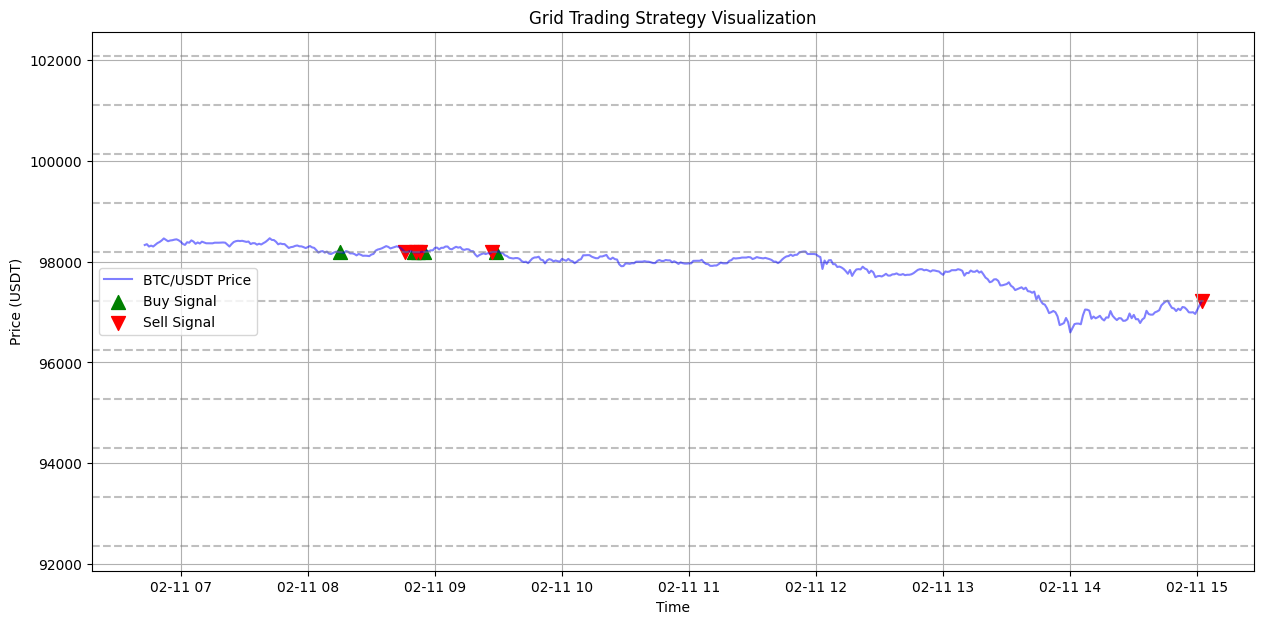

In [20]:

import matplotlib.pyplot as plt


# Expand time frame to include 2025
df = df.loc[df.index >= '2025-01-30']  # Show data from 2025 onwards
# Track last trade direction
last_trade = None  
trades = []

# Simulate trading
for index, row in df.iterrows():
    price = row['close']
    for grid_price in grid_prices:
        if abs(price - grid_price) <= 5:  # Reduced threshold for more trades
            if last_trade == "SELL" or last_trade is None:
                trades.append({'time': index, 'price': price, 'action': 'BUY'})
                last_trade = "BUY"
            elif last_trade == "BUY":
                trades.append({'time': index, 'price': price, 'action': 'SELL'})
                last_trade = "SELL"

# Convert trades to DataFrame
trades_df = pd.DataFrame(trades)
trades_df.set_index('time', inplace=True)

# Plot price data
plt.figure(figsize=(15, 7))  # Increased figure size for better visualization
plt.plot(df.index, df['close'], label='BTC/USDT Price', color='blue', alpha=0.5)

# Plot grid levels
for grid_price in grid_prices:
    plt.axhline(y=grid_price, color='gray', linestyle='--', alpha=0.5)

# Plot buy/sell signals
plt.scatter(trades_df[trades_df['action'] == 'BUY'].index, 
            trades_df[trades_df['action'] == 'BUY']['price'], 
            marker='^', color='green', label='Buy Signal', s=100)
plt.scatter(trades_df[trades_df['action'] == 'SELL'].index, 
            trades_df[trades_df['action'] == 'SELL']['price'], 
            marker='v', color='red', label='Sell Signal', s=100)

# Labels and legend
plt.title('Grid Trading Strategy Visualization')
plt.xlabel('Time')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid()
plt.show()
